# Practical Machine Learning for Physicists
## Week 2 Exercise - Part 2
## Deadline Monday 9th November at 12pm (Noon)

For both of these tasks we want you to implement autoencoder networks that:
- Train on randomly generated circles (using the circle_generator function below)
- Use 27x27 pixel images
- Use no more than 30,000 randomly generated samples (e.g. batchsize 30 and 1000 steps, or batchsize 1000 and 30 steps, or anywhere inbetween) in training the final networks for each task
- Use the mean_squared_error loss function
- Fulfil the network size requirement listed in the task (can be verifired using the print_layers function, after the network is partially trained)

### Task 1:
Implement any network design, but the bottleneck must contain no more than 9 neurons.

### Task 2:
Implement any network design, but the bottleneck must contain no more than 3 neurons.



#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these tasks. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Task 1 performance (0.02 is a good target cost to do better than)
- Task 2 performance ( a good target here is left for the student to determine)



In [117]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [118]:
#A big messy function to do the training
# model -- our keras neural model autoencoder
# image_generator -- a function to generate random images for the training (see below for examples)
# img_size -- the size of our image in pixels
# batchsize -- the number of images to include in each training batch
# steps -- the number of steps taken in the training
#
# returns an array of the costs
def generate_and_train(model,image_generator,img_size,batchsize,steps):
   
    #Generate an array of the numbers 1 to img_size and create a meshgrid from them    
    pixels=np.linspace(-1,1,img_size)
    x,y=np.meshgrid(pixels,pixels)
    
    #Now create a test image using 1 call to image_generator
    #y_test=np.zeros([1,pixels,pixels,1])
    #y_test[:,:,:,0]=image_generator(1,x,y)
    
    #Now create the empty arrays for the images and cost
    y_in=np.zeros([batchsize,img_size,img_size,1])
    y_target=np.zeros([batchsize,img_size,img_size,1])
    cost=np.zeros(steps)
    
    #Loop through the steps, get a random batch of samples, train the model, repeat
    for k in range(steps):
        # produce samples:
        y_in[:,:,:,0]=image_generator(batchsize,x,y)
        y_target=np.copy(y_in) # autoencoder wants to reproduce its input!
        
        # do one training step on this batch of samples:
        cost[k]=model.train_on_batch(y_in,y_target)
    
    return cost,y_target

def get_test_image(image_generator,img_size):
    #Generate an array of the numbers 1 to img_size and create a meshgrid from them    
    pixels=np.linspace(-1,1,img_size)
    x,y=np.meshgrid(pixels,pixels)
    
    #Now create a test image using 1 call to image_generator
    y_test=np.zeros([1,img_size,img_size,1])
    y_test[:,:,:,0]=image_generator(1,x,y)
    return y_test

# A function to generate and plot a single test image and the output of our model
# only to be called after training the model
def plot_test_image(model,image_generator,img_size):
    #Get random test image
    y_test=get_test_image(image_generator,img_size)
    
    #Create the output image
    y_test_out=model.predict_on_batch(y_test)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(y_test[0,:,:,0],origin='lower')
    ax[0].set_title("Input")
    ax[1].imshow(y_test_out[0,:,:,0],origin='lower')
    ax[1].set_title("Output")
    
def print_layers(network, y_in):
    """
    Call this on some test images y_in, to get a print-out of
    the layer sizes. Shapes shown are (batchsize,pixels,pixels,channels).
    After a call to the visualization routine, y_target will contain
    the last set of training images, so you could feed those in here.
    """
    layer_features=get_layer_activations(network,y_in)
    #print(layer_features)
    for idx,feature in enumerate(layer_features):
        s=np.shape(feature)
        print("Layer "+str(idx)+": "+str(s[1]*s[2]*s[3])+" neurons / ", s)

def get_layer_activation_extractor(network):
    #print(network.inputs)
    #for layer in network.layers:
    #    print(layer.output)
    return(keras.Model(inputs=network.inputs,
                            outputs=[layer.output for layer in network.layers]))

def get_layer_activations(network, y_in):
    """
    Call this on some test images y_in, to get the intermediate 
    layer neuron values. These are returned in a list, with one
    entry for each layer (the entries are arrays).
    """
    extractor=get_layer_activation_extractor(network)
    #print(extractor)
    layer_features = extractor(y_in)
    return layer_features
    

## Circle generator


In [119]:
# A simple image generator that returns an array of batchsize images
# each image has a size of x * y pixels
# in this image each image has a randomly placed circle (and the circle is of random size)
def circle_generator(batchsize,x,y):
    R=np.random.uniform(size=batchsize)
    x0=np.random.uniform(size=batchsize,low=-1,high=1)
    y0=np.random.uniform(size=batchsize,low=-1,high=1)
    return( 1.0*((x[None,:,:]-x0[:,None,None])**2 + (y[None,:,:]-y0[:,None,None])**2 < R[:,None,None]**2) )


In [120]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.6.0


# Task 1

Firstly let's build our auto-encoder model.

In [153]:
model_1=keras.models.Sequential()


model_1.add(keras.layers.Conv2D(10,7,input_shape=(None,None,1),
               activation="relu",padding='same'))
model_1.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model_1.add(keras.layers.Conv2D(10,7,
               activation="relu",padding='same'))
model_1.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model_1.add(keras.layers.Conv2D(1,3,
               activation="relu",padding='same'))
model_1.add(keras.layers.UpSampling2D(size=(3,3))) # up
model_1.add(keras.layers.Conv2D(10,7,
               activation="relu",padding='same'))
model_1.add(keras.layers.UpSampling2D(size=(3,3))) # up
model_1.add(keras.layers.Conv2D(10,7,
               activation="sigmoid",padding='same'))
model_1.add(keras.layers.Conv2D(9,8,activation="linear",padding='same'))
model_1.compile(loss='mean_squared_error',
              optimizer='adam')
model_1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, None, None, 10)    500       
_________________________________________________________________
average_pooling2d_51 (Averag (None, None, None, 10)    0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, None, None, 10)    4910      
_________________________________________________________________
average_pooling2d_52 (Averag (None, None, None, 10)    0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, None, None, 1)     91        
_________________________________________________________________
up_sampling2d_53 (UpSampling (None, None, None, 1)     0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, None, None, 10)  

(0, 0.1)

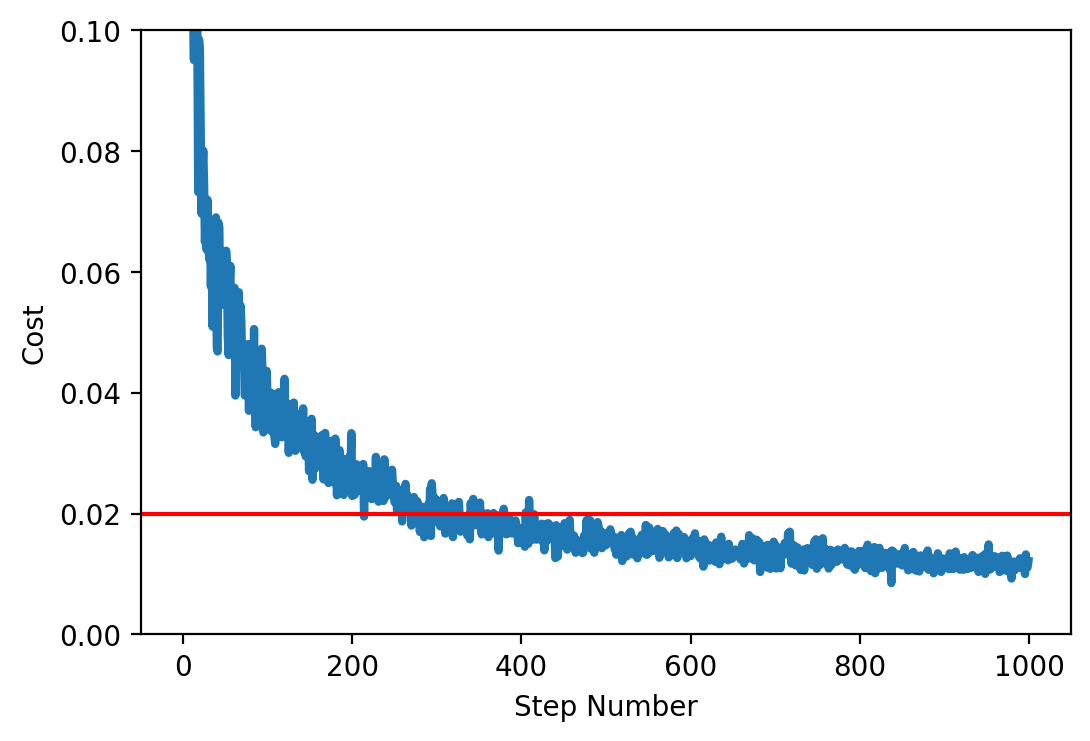

In [154]:
#Now we can do the actual model training
steps=1000
cost,y_target=generate_and_train(model_1,circle_generator,img_size=9*3,batchsize=30,steps=steps)
#Plot the cost
fig, ax = plt.subplots()
stepArray=np.arange(steps) 
ax.plot(stepArray,cost,linewidth=3) 
ax.axhline(y=0.02, color='r', linestyle='-')
ax.set_xlabel("Step Number") 
ax.set_ylabel("Cost")
ax.set_ylim(0,0.10)

In [155]:
print("The final cost of the auto encoder with 3 neurons bottleneck is:",cost[-1])

The final cost of the auto encoder with 3 neurons bottleneck is: 0.012154809199273586


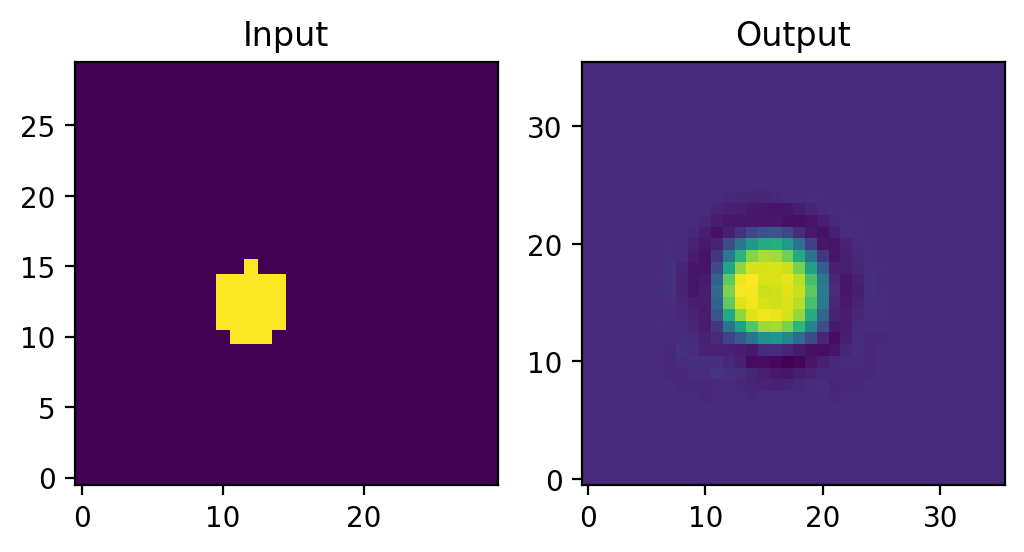

In [162]:
plot_test_image(model_1,circle_generator,30)

As we can see the auto-encoder is able to compress the information in a 27x27 pixels image to just 9 neurons and still maintain a good representation of the original image.

In [144]:
print_layers(model_1,y_target)

Layer 0: 7290 neurons /  (30, 27, 27, 10)
Layer 1: 810 neurons /  (30, 9, 9, 10)
Layer 2: 810 neurons /  (30, 9, 9, 10)
Layer 3: 90 neurons /  (30, 3, 3, 10)
Layer 4: 9 neurons /  (30, 3, 3, 1)
Layer 5: 81 neurons /  (30, 9, 9, 1)
Layer 6: 810 neurons /  (30, 9, 9, 10)
Layer 7: 7290 neurons /  (30, 27, 27, 10)
Layer 8: 7290 neurons /  (30, 27, 27, 10)
Layer 9: 6561 neurons /  (30, 27, 27, 9)


## Task 2

In [106]:
model_2=keras.models.Sequential()
# 3x3 kernel size, 10 channels in first hidden layer:
model_2.add(keras.layers.Conv2D(30,10,input_shape=(None,None,1),
               activation="relu",padding='same'))
model_2.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model_2.add(keras.layers.Conv2D(10,10,
               activation="relu",padding='same'))
model_2.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model_2.add(keras.layers.Conv2D(10,10,input_shape=(None,None,1),
               activation="relu",padding='same'))
model_2.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model_2.add(keras.layers.Conv2D(3,3,
               activation="relu",padding='same'))
model_2.add(keras.layers.UpSampling2D(size=(3,3))) # up
model_2.add(keras.layers.Conv2D(10,10,
               activation="relu",padding='same'))
model_2.add(keras.layers.UpSampling2D(size=(3,3))) # up
model_2.add(keras.layers.Conv2D(30,10,
               activation="relu",padding='same'))
model_2.add(keras.layers.UpSampling2D(size=(3,3))) # up
model_2.add(keras.layers.Conv2D(10,10,
               activation="sigmoid",padding='same'))
model_2.compile(loss='mean_squared_error',
              optimizer='adam')
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, None, None, 30)    3030      
_________________________________________________________________
average_pooling2d_42 (Averag (None, None, None, 30)    0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, None, None, 10)    30010     
_________________________________________________________________
average_pooling2d_43 (Averag (None, None, None, 10)    0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, None, None, 10)    10010     
_________________________________________________________________
average_pooling2d_44 (Averag (None, None, None, 10)    0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, None, None, 3)   

Text(0, 0.5, 'Cost')

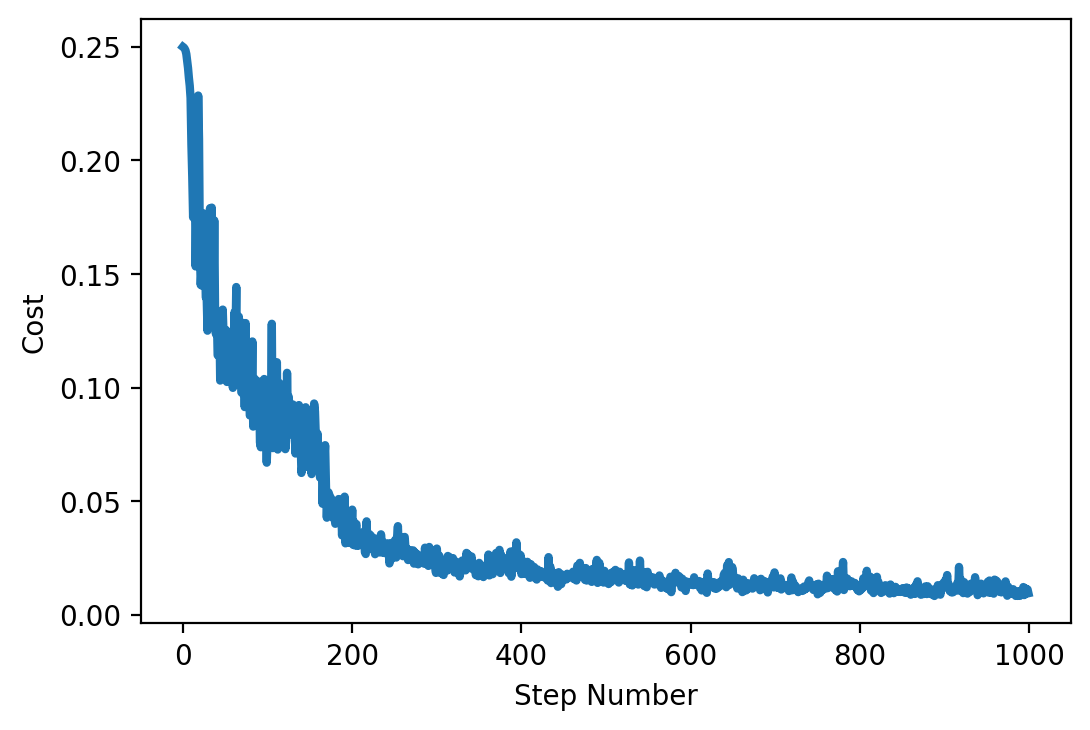

In [107]:
#Now we can do the actual model training
steps=1000
cost,y_target=generate_and_train(model_2,circle_generator,img_size=9*3,batchsize=30,steps=steps)
#Plot the cost
fig, ax = plt.subplots()
stepArray=np.arange(steps) 
ax.plot(stepArray,cost,linewidth=3) 
ax.set_xlabel("Step Number") 
ax.set_ylabel("Cost")

In [116]:
print("The final cost of the auto encoder with 3 neurons bottleneck is:",cost[-1])

The final cost of the auto encoder with 3 neurons bottleneck is: 0.00945948250591755


In [108]:
print_layers(model_2,y_target)

Layer 0: 21870 neurons /  (30, 27, 27, 30)
Layer 1: 2430 neurons /  (30, 9, 9, 30)
Layer 2: 810 neurons /  (30, 9, 9, 10)
Layer 3: 90 neurons /  (30, 3, 3, 10)
Layer 4: 90 neurons /  (30, 3, 3, 10)
Layer 5: 10 neurons /  (30, 1, 1, 10)
Layer 6: 3 neurons /  (30, 1, 1, 3)
Layer 7: 27 neurons /  (30, 3, 3, 3)
Layer 8: 90 neurons /  (30, 3, 3, 10)
Layer 9: 810 neurons /  (30, 9, 9, 10)
Layer 10: 2430 neurons /  (30, 9, 9, 30)
Layer 11: 21870 neurons /  (30, 27, 27, 30)
Layer 12: 7290 neurons /  (30, 27, 27, 10)


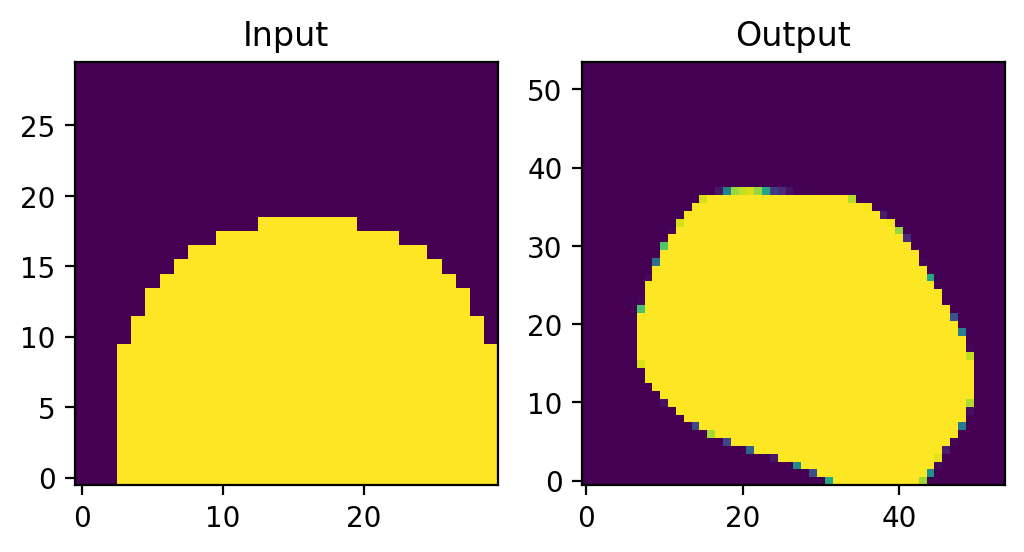

In [113]:
plot_test_image(model_2,circle_generator,30)

# Discussion

The two auto-encoder created in Task 1 and Task 2 of this notebook have a bottleneck of respectively 9 and 3 neurons.

As it can be seen from the plots above both auto-encoders are able to achieve a cost which is lower than 0.02.

In both models I chose to distribute the 30k samples in 1000 steps and 30 batches, as this values allows a good number of training iterations (steps) for the model as well as a good batch of samples to learn from. 

In both models I chose to use the "relu" activation function for all the layers except the last one, which is using a "sigmoid". I realised that this approach leads to lower cost and faster convergence than using all "sigmoids". However I included a sigmoid in the last layer to make the resulting images more smooth.

In Task 1 the model used to build the auto-encoder uses 3 convolutional layers to reach the bottleneck of 9 neurons. For the convolutional layers I chose to use 10 filters and a 7x7 kernel to achieve a low cost model. The kernel determines how much the image is reduced in size and therefore how much information is passed to the successive layer.

In Task 2 the model has one more convolutional layer than the model used in Task 1 to achieve a bottleneck of 3 neurons. In this case I chose a variable number of filters to make the model efficient but still low cost. the Kernel size in this case was increased to 10.

If we compare the two auto-encoders we can see that even though they achieve a similar cost, the first has a larger bottleneck and therefore compresses the information from the original input to a higher number of neurons. For this reason the first autoencoder achieves a low cost using a smaller number of parameters, and is able to reproduce the original image more accurately